In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df1 = pd.read_csv("ratings.csv")
df2 = pd.read_csv("movies.csv")

In [3]:
dataset = pd.merge(df1,df2,on='movieId')

In [4]:
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
# Dropping the timestamp column
dataset = dataset.drop(columns=['timestamp'])

In [6]:
dataset.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

userId      610
movieId    9724
rating       10
title      9719
genres      951
dtype: int64


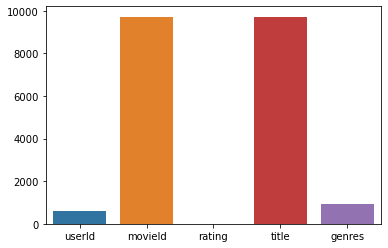

In [7]:
# Looking at Unique Counts and Data shape 
print(dataset.nunique(axis=0))
sns.barplot(x = dataset.columns, y = dataset.nunique(axis=0));


# ### UNIVARIATE ANALYSIS

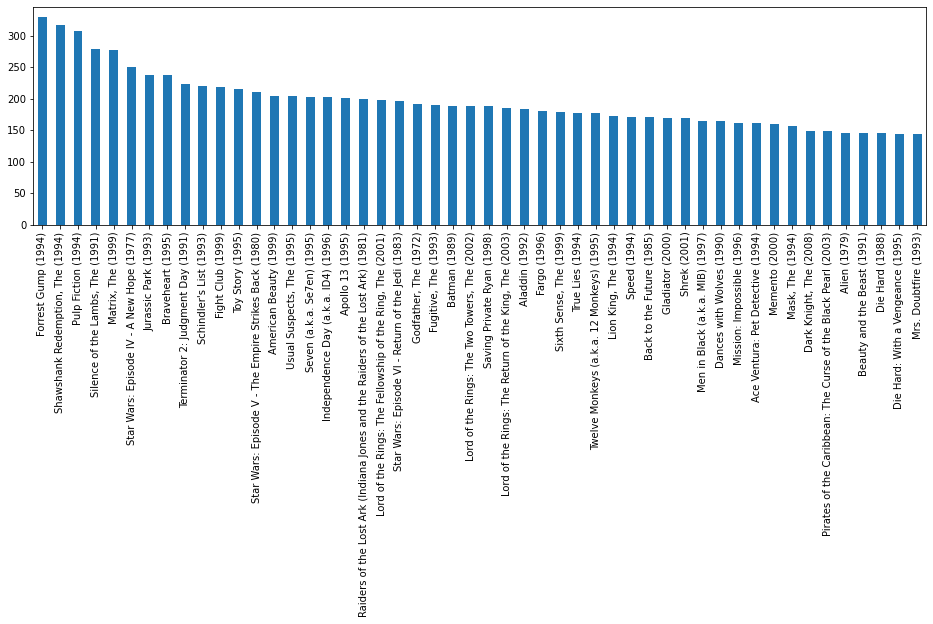

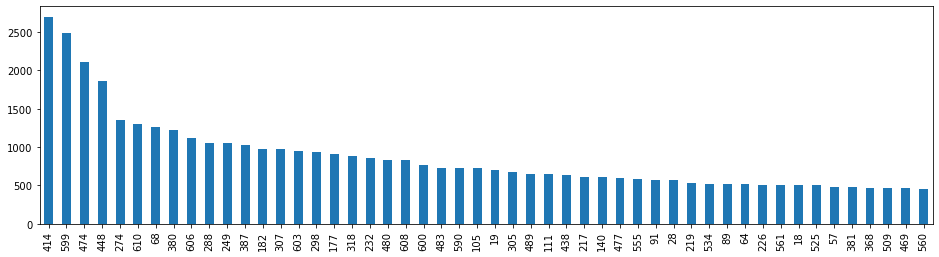

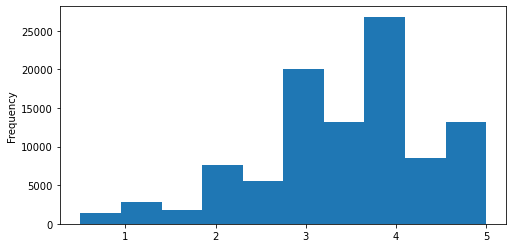

In [8]:


# Univariate Analysis
plt.figure(1, figsize = (16,4))
dataset['title'].value_counts()[:50].plot(kind = 'bar') #take top 50 movies
plt.figure(2, figsize = (16,4))
dataset['userId'].value_counts()[:50].plot(kind = 'bar') #take top 50 users
plt.figure(3, figsize = (8,4))
dataset['rating'].plot(kind = 'hist');


# ### JOINT ANALYSIS

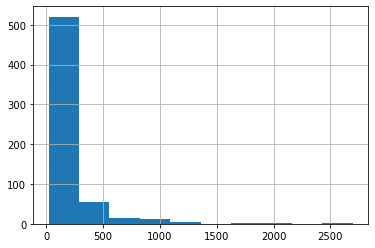

In [9]:


ratings_per_user_ID = dataset.groupby('userId')['movieId'].count() 
ratings_per_user_ID.hist();

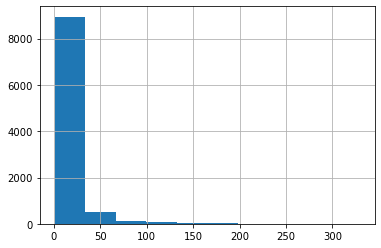

In [10]:


ratings_per_movieid = dataset.groupby('movieId')['userId'].count() 
ratings_per_movieid.hist();

In [11]:


#get the max id in set, and add yourself as next user
max_id = max(dataset["userId"])
print("max_id :",max_id)
my_id = max_id + 1
print("my_id :",my_id)

max_id : 610
my_id : 611


In [12]:


#create a map of movieId -> title
title_movieId_map = { y:x for x,y in dataset[ ["movieId","title"] ].to_numpy() }

In [13]:


title_movieId_map

{'Toy Story (1995)': 1,
 'Grumpier Old Men (1995)': 3,
 'Heat (1995)': 6,
 'Seven (a.k.a. Se7en) (1995)': 47,
 'Usual Suspects, The (1995)': 50,
 'From Dusk Till Dawn (1996)': 70,
 'Bottle Rocket (1996)': 101,
 'Braveheart (1995)': 110,
 'Rob Roy (1995)': 151,
 'Canadian Bacon (1995)': 157,
 'Desperado (1995)': 163,
 'Billy Madison (1995)': 216,
 'Clerks (1994)': 223,
 'Dumb & Dumber (Dumb and Dumber) (1994)': 231,
 'Ed Wood (1994)': 235,
 'Star Wars: Episode IV - A New Hope (1977)': 260,
 'Pulp Fiction (1994)': 296,
 'Stargate (1994)': 316,
 'Tommy Boy (1995)': 333,
 'Clear and Present Danger (1994)': 349,
 'Forrest Gump (1994)': 356,
 'Jungle Book, The (1994)': 362,
 'Mask, The (1994)': 367,
 'Blown Away (1994)': 423,
 'Dazed and Confused (1993)': 441,
 'Fugitive, The (1993)': 457,
 'Jurassic Park (1993)': 480,
 'Mrs. Doubtfire (1993)': 500,
 "Schindler's List (1993)": 527,
 'So I Married an Axe Murderer (1993)': 543,
 'Three Musketeers, The (1993)': 552,
 'Tombstone (1993)': 553,
 '

In [14]:


#defines movies that you want to rate 5 
my_5_list = ['Toy Story (1995)','Taxi Driver (1976)','Down Periscope (1996)',
             'Amazing Panda Adventure, The (1995)','Wizard of Oz, The (1939)']

In [15]:


for my_5 in my_5_list:
    movide_id = title_movieId_map[my_5] 
    dataset.loc[len(dataset)] = [my_id, movide_id,5, my_5,"Drama"]

In [16]:


# Rate checking
dataset[dataset["userId"]==my_id]

,userId,movieId,rating,title,genres
100836,611,1,5.0,Toy Story (1995),Drama
100837,611,111,5.0,Taxi Driver (1976),Drama
100838,611,135,5.0,Down Periscope (1996),Drama
100839,611,146,5.0,"Amazing Panda Adventure, The (1995)",Drama
100840,611,919,5.0,"Wizard of Oz, The (1939)",Drama


In [17]:


#create utility maps
movieId_genres_map = { x:y for x,y in dataset[ ["movieId","genres"] ].to_numpy() }
movieId_title_map = { x:y for x,y in dataset[ ["movieId","title"] ].to_numpy() }

genres_sorted = [movieId_genres_map[k] for k in sorted(movieId_genres_map.keys())]
title_sorted = [movieId_title_map[k] for k in sorted(movieId_title_map.keys())]

index_movieId_map = { index:k for index,k in enumerate(sorted(movieId_genres_map.keys())) }
movieId_index_map = { index_movieId_map[k]:k for k in index_movieId_map.keys() }

print(len(movieId_title_map))
print(title_sorted[0:5])
print(movieId_title_map[1])
print(movieId_title_map[2])

9724
['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)']
Toy Story (1995)
Jumanji (1995)


In [25]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\HP\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-t4iequmd\\scikit-surprise_8561ce9534b84247ad8f5e24a8376a7d\\setup.py'"'"'; __file__='"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-t4iequmd\\scikit-surprise_8561ce9534b84247ad8f5e24a8376a7d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\HP\AppData\Local\Temp\pip-wheel-2pxy194c'
       cwd: C:\Users\HP\AppData\Local\Temp\pip-install-t4iequmd\scikit-surprise_8561ce9534b84247ad8f5e24a8376a7d\
  Complete output (50 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-


    Running setup.py install for scikit-surprise: finished with status 'error'


In [26]:
from surprise import SVD
from surprise import Reader, Dataset, SVD, SVDpp
from surprise import accuracy
from surprise import KNNWithMeans, KNNWithZScore, CoClustering

ModuleNotFoundError: No module named 'surprise'

In [ ]:


len(dataset)

In [ ]:


dataset[ dataset["userId"] == my_id ]

In [ ]:


#Just give your scale and columns
reader = Reader()
df = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader=reader)

In [ ]:


trainset = df.build_full_trainset()

In [ ]:


trainset

In [ ]:


# list of ratings that can be used as a testset in the
#The ratings are all the ratings that are **not** in the trainset
#so this set = user_count * item_count - already_rated
anti_testset = trainset.build_anti_testset()
len(anti_testset )

In [ ]:


#The ratings are all the ratings that are in the trainset,
#already_rated , length of original df_user_movie_rating dataframe
testset = trainset.build_testset()
len(testset)

In [ ]:


#check my items in set
trainset.ur[ trainset.to_inner_uid(my_id) ]

In [ ]:


#Library has a concept of inner_id and your original id
#check methods for which to use
trainset.to_inner_uid(my_id)

In [ ]:


#get the items rated and NOT rated by user and return them
def get_user_sets(user_id):
    inner_user_id = user_id 
    blank_user_set = []
    for uid, iid, fill in anti_testset:
        if uid == inner_user_id:
            blank_user_set.append( ( uid, iid, fill ) )
    rated_user_set = []        
    for uid, iid, fill in testset:
        if uid == inner_user_id:
            rated_user_set.append( ( uid, iid, fill ) )        
            
    return  blank_user_set  ,rated_user_set     

In [ ]:


user_blank_set,rated_user_set =  get_user_sets( my_id )

In [ ]:


#check if numbers are correct
print(len(user_blank_set))
print(len(rated_user_set))

In [ ]:


#see a sample
rated_user_set[2]

In [ ]:


#try different algorithms with 1 line  :(
#they will not need us anymore
svd_100 = SVD(n_factors=100)
svd_100.fit(trainset)

svd_20 = SVD(n_factors=20)
svd_20.fit(trainset)

svd_50 = SVD(n_factors=50)
svd_50.fit(trainset)

knn_WithMeans = KNNWithMeans()
knn_WithMeans.fit(trainset)

knn_WithZScore = KNNWithZScore()
knn_WithZScore.fit(trainset)

co_Clustering = CoClustering()
co_Clustering.fit(trainset)

In [ ]:


#find predictions and calculate rmse,mae
def get_predictions(model,dataset):
    preds = model.test(dataset)    
    rmse = accuracy.rmse(preds, verbose=False)
    mae = accuracy.mae(preds, verbose=False)   
    
    preds.sort(key=lambda x: x[3], reverse=True)    
    preds = preds[0:20]
    df1 = pd.DataFrame(preds,columns=["userId","movieId","actual","predicted","details"])    
    df1["movieId"] = df1["movieId"].apply(lambda x : movieId_title_map[int(x)] )
    
    return df1[ ["movieId","actual","predicted"] ],rmse,mae

In [ ]:


#check one sample , we can call like this to get rmse and mae
_,rmse,mae = get_predictions(svd_100,rated_user_set)
print(f"rmse :{round(rmse,3)} \nmae  :{round(mae,3)}")

In [ ]:


#ugly method instead of toString
def get_obj_name(obj_name):
    ret_name = ""
    for objname, oid in globals().items():
        if oid is obj_name:
            #print("objname, oid",objname, oid)
            ret_name = objname
    return ret_name

In [ ]:


len(rated_user_set)

In [ ]:


#Evaluate all models and dump their Rmse and Mae
#This is for me, I am checking best results for me, 
#but this is not reliable, dataset is so small

user_blank_set,rated_user_set =  get_user_sets( my_id )

models_to_eval = [svd_20,svd_50,svd_100 , knn_WithMeans, knn_WithZScore, co_Clustering]
models_names = ["svd_20","svd_50","svd_100","knn_WithMeans","knn_WithZScore","co_Clustering"]


results = []
for model_,name_ in zip( models_to_eval,models_names ) :
    _,rmse,mae = get_predictions(model_,rated_user_set)
    results.append( [name_,round(rmse,3),round(mae,3) ]) 
    
pd.DataFrame(results,columns = ["Model Name","Rmse","Mae"]).sort_values(by="Mae")

In [ ]:


#Evaluate all models and dump their Rmse and Mae
#This is for all set so more reliable
models_to_eval = [svd_20,svd_50,svd_100 , knn_WithMeans, knn_WithZScore, co_Clustering]
models_names = ["svd_20","svd_50","svd_100","knn_WithMeans","knn_WithZScore","co_Clustering"]


results = []
for model_,name_ in zip( models_to_eval,models_names ) :
    _,rmse,mae = get_predictions(model_,testset)
    results.append( [name_,round(rmse,3),round(mae,3) ]) 
    
pd.DataFrame(results,columns = ["Model Name","Rmse","Mae"]).sort_values(by="Mae")

In [ ]:


y = pd.DataFrame(results,columns = ["Model Name","Rmse","Mae"]).sort_values(by="Mae")

In [ ]:


sns.lineplot(x = y['Model Name'], y = y['Rmse']);

In [ ]:


df,_,_ = get_predictions(svd_100,user_blank_set)
df.head(10)

In [ ]:


df,_,_ = get_predictions(knn_WithZScore,user_blank_set)
df.head(10)

In [ ]:


df,_,_ = get_predictions(knn_WithMeans,user_blank_set)
df.head(10)

In [ ]:


df,_,_ = get_predictions(svd_20,user_blank_set)
df.head(10)

In [ ]:


df,_,_ = get_predictions(svd_50,user_blank_set)
df.head(10)

In [ ]:


df,_,_ = get_predictions(co_Clustering,user_blank_set)
df.head(10)